In [1]:
import os
import numpy as np
from dtw import dtw
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [2]:
def similarity_DTW(s1, s2):
    ratio = 50 # 设定的放缩系数，避免数据的相似度过于集中
    euclidean_norm = lambda x, y: np.abs(ratio * (x - y))
    d, cost_matrix, acc_cost_matrix, path = dtw(s1, s2, dist=euclidean_norm)
    score = 1 - np.tanh(d)  # 相似度的评分【0,1】 0： 完全不同， 1： 完全相同
    return score

DBA_cluster = np.load("./processing/DBA_wave.pkl", allow_pickle=True)
DBA_clustering_heatmap = np.zeros((len(DBA_cluster), len(DBA_cluster)))
id_list = list(DBA_cluster.keys())
for i, id in enumerate(tqdm(id_list)):
    s1 = DBA_cluster[id]
    for j in range(0, i+1):
        id_2 = id_list[j]
        s2 = DBA_cluster[id_2]
        score = similarity_DTW(s1, s2)
        DBA_clustering_heatmap[i][j] = score
        DBA_clustering_heatmap[j][i] = score

100%|██████████| 7/7 [00:00<00:00, 34.26it/s]


          0         1         2         3         4         5         6
0  1.000000  0.696607  0.308682  0.004413  0.273304  0.012236  0.002917
1  0.696607  1.000000  0.209395  0.010587  0.329304  0.011717  0.004754
2  0.308682  0.209395  1.000000  0.013241  0.122678  0.156160  0.002735
3  0.004413  0.010587  0.013241  1.000000  0.030979  0.091783  0.007271
4  0.273304  0.329304  0.122678  0.030979  1.000000  0.033002  0.038302
5  0.012236  0.011717  0.156160  0.091783  0.033002  1.000000  0.001204
6  0.002917  0.004754  0.002735  0.007271  0.038302  0.001204  1.000000
[0, 1, 3, 4, 6, 5, 2]
['ClusterID0', 'ClusterID1', 'ClusterID3', 'ClusterID4', 'ClusterID6', 'ClusterID5', 'ClusterID2']
            ClusterID0  ClusterID1  ClusterID3  ClusterID4  ClusterID6  \
ClusterID0    1.000000    0.696607    0.308682    0.004413    0.273304   
ClusterID1    0.696607    1.000000    0.209395    0.010587    0.329304   
ClusterID3    0.308682    0.209395    1.000000    0.013241    0.122678   
Cluster

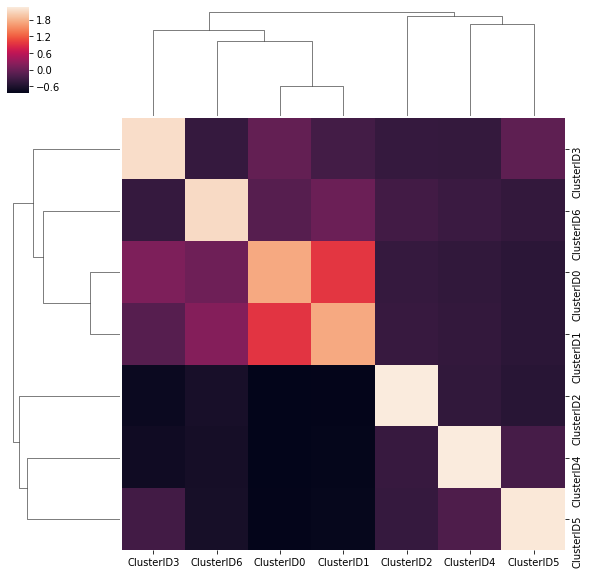

In [3]:
data_frame = pd.DataFrame(DBA_clustering_heatmap)
print(data_frame)

print(id_list)
cluster_id = ["ClusterID{}".format(x) for x in id_list]
print(cluster_id)
cluster_result = data_frame.rename(index=dict(zip(range(len(cluster_id)), cluster_id)), columns=dict(zip(range(len(cluster_id)), cluster_id)))
print(cluster_result)
# print(data_frame)

# metric数据度量方法, method计算聚类的方法
# standard_scale标准维度（0：行或1：列即每行或每列的含义，减去最小值并将每个维度除以其最大值）
# sns.clustermap(cluster_result, metric="correlation", method="single", cmap="Blues", standard_scale=1)
# sns.clustermap(cluster_result, standard_scale=1)
# Normalize 正则化
sns.clustermap(cluster_result, z_score=1)
plt.savefig("./pdf/cluster_heatmap.pdf")
plt.show()